In [1]:
import warnings

In [2]:
from yellowbrick.classifier import PrecisionRecallCurve 

In [3]:
warnings.filterwarnings('ignore')

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
from sklearn.svm import SVC

In [6]:
from sklearn.model_selection import GridSearchCV

In [7]:
from sklearn.metrics import confusion_matrix,classification_report,precision_recall_curve,average_precision_score

In [8]:
import seaborn as sn

In [9]:
import tensorflow as tf

In [10]:
from sklearn.preprocessing import label_binarize

In [11]:
import matplotlib.pyplot as plt

In [12]:
import pandas as pd

# SVM

In [13]:
df = pd.read_csv('/home/user/Downloads/zoo.data',sep = ',',header = None)

In [14]:
df.columns = ['animal-name','hair','feathers','eggs','milk','airborne','aquatic','predator','toothed','backbone','breathes','venomous','fins','legs','tail','domestic','catsize','type']

In [15]:
X = df.drop(columns = ['animal-name','type'],axis = 1)

In [16]:
Y = df['type']

In [17]:
train_x,test_x,train_y,test_y = train_test_split(X,Y,test_size = 0.28,stratify = Y)

In [18]:
train_y.value_counts()

1    29
2    14
4     9
7     7
6     6
3     4
5     3
Name: type, dtype: int64

In [19]:
test_y.value_counts()

1    12
2     6
4     4
7     3
6     2
5     1
3     1
Name: type, dtype: int64

In [20]:
Y.value_counts()

1    41
2    20
4    13
7    10
6     8
3     5
5     4
Name: type, dtype: int64

In [21]:
params = [{'C': [1, 10, 100], 'kernel': ['linear'],'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]},
          {'C': [1, 10, 100], 'kernel': ['rbf'],'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]},
          {'C':[1,10,100],'kernel':['poly'],'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]},
          {'C':[1,10,100],'kernel':['sigmoid'],'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}]

In [22]:
supp = SVC()

In [23]:
gs = GridSearchCV(estimator = supp,param_grid = params,scoring = 'accuracy',cv = 5)

In [24]:
gs.fit(train_x,train_y)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'C': [1, 10, 100], 'kernel': ['linear'], 'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}, {'C': [1, 10, 100], 'kernel': ['rbf'], 'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}, {'C': [1, 10, 100], 'kernel': ['poly'], 'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}, {'C': [1, 10, 100], 'kernel': ['sigmoid'], 'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [25]:
gs.best_score_

0.9722222222222222

In [26]:
gs.best_estimator_

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.1, kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [27]:
best = gs.best_params_

In [28]:
best

{'C': 1, 'gamma': 0.1, 'kernel': 'linear'}

In [29]:
best_pred = gs.predict(test_x)

Classification Report for best parameter:
Parameters:
  {'C': 1, 'gamma': 0.1, 'kernel': 'linear'}
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00         6
           3       0.50      1.00      0.67         1
           4       1.00      1.00      1.00         4
           5       0.00      0.00      0.00         1
           6       0.67      1.00      0.80         2
           7       1.00      0.67      0.80         3

   micro avg       0.93      0.93      0.93        29
   macro avg       0.74      0.81      0.75        29
weighted avg       0.93      0.93      0.92        29



/home/user/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/user/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/user/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


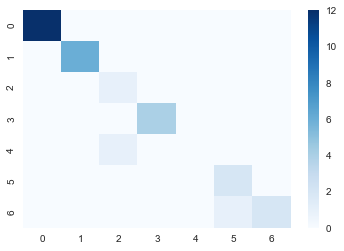

In [30]:
print("Classification Report for best parameter:\nParameters:\n ",best)
print(classification_report(test_y,best_pred))
cm = confusion_matrix(test_y,best_pred)
sn.heatmap(cm,cmap = 'Blues')

In [31]:
kernels = ['linear','rbf','sigmoid','poly']

In [32]:
print("Classification Report For All Kernels in SVM:\n")
for i in kernels:
    print(i,":\n")
    sv = SVC(kernel = i)
    sv.fit(train_x,train_y)
    pred = sv.predict(test_x)
    print(classification_report(test_y,pred))
    print("Score: ",sv.score(test_x,test_y))

Classification Report For All Kernels in SVM:

linear :

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00         6
           3       0.50      1.00      0.67         1
           4       1.00      1.00      1.00         4
           5       0.00      0.00      0.00         1
           6       0.67      1.00      0.80         2
           7       1.00      0.67      0.80         3

   micro avg       0.93      0.93      0.93        29
   macro avg       0.74      0.81      0.75        29
weighted avg       0.93      0.93      0.92        29

Score:  0.9310344827586207
rbf :

              precision    recall  f1-score   support

           1       0.86      1.00      0.92        12
           2       1.00      1.00      1.00         6
           3       0.00      0.00      0.00         1
           4       1.00      1.00      1.00         4
           5       0.00      0.00      0.

/home/user/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/user/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/user/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/user/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predict

In [33]:
precision = dict()

In [34]:
recall = dict()
av_precision = dict()

In [35]:
test_y_lb = label_binarize(test_y,classes=[1,2,3,4,5,6,7])
best_pred = label_binarize(best_pred,classes=[1,2,3,4,5,6,7])

In [36]:
for i in range(7):
    precision[i],recall[i],_ = precision_recall_curve(test_y_lb[:,i],best_pred[:,i])
    av_precision[i] = average_precision_score(test_y_lb[:,i],best_pred[:,i])

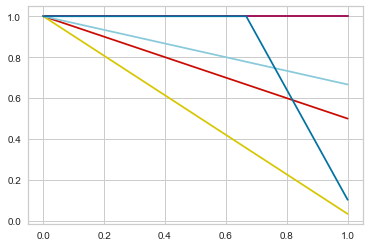

In [37]:
for i in range(7):
    plt.plot(recall[i], precision[i])

# Neural Network

In [39]:
df = pd.read_csv('/home/user/Downloads/zoo.data',sep = ',',header = None)

In [40]:
df.columns = ['animal-name','hair','feathers','eggs','milk','airborne','aquatic','predator','toothed','backbone','breathes','venomous','fins','legs','tail','domestic','catsize','type']

In [41]:
X = df.drop(columns = ['animal-name','type'],axis = 1)

In [42]:
Y = df[['type']]

In [43]:
train_x, test_x, train_y, test_y = train_test_split(X,Y, test_size=0.28, random_state=1, stratify=Y)

In [44]:
X = tf.placeholder(tf.float32, [None,16]) 
Y = tf.placeholder(tf.int32, [None, 1])

In [45]:
Y_o_h = tf.one_hot(Y, 7) 
Y_o_h = tf.reshape(Y_o_h, [-1, 7])

In [46]:
W = tf.Variable(tf.random_normal([16, 7],seed=0), name='weight')
b = tf.Variable(tf.random_normal([7],seed=0), name='bias')

In [47]:
z = tf.matmul(X, W) + b

In [48]:
hyp = tf.nn.softmax(z)
cost_i = tf.nn.softmax_cross_entropy_with_logits(logits=z,labels=Y_o_h)
cost = tf.reduce_mean(cost_i)

In [49]:
train  = tf.train.GradientDescentOptimizer(learning_rate=0.05).minimize(cost)

In [50]:
pred = tf.argmax(hyp, 1)
correct_pred = tf.equal(pred, tf.argmax(Y_o_h, 1))
acc = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

In [51]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for step in range(10001):
        sess.run(train, feed_dict={X: train_x, Y: train_y})
        if step % 1000 == 0:
            loss, accu= sess.run([cost, acc], feed_dict={X: train_x, Y: train_y})
            print("Step: ",step,"\tLoss: ",loss,"\tAccuracy: ",acc)
            
    train_acc = sess.run(acc, feed_dict={X: train_x, Y: train_y})
    test_acc,test_predict,test_correct = sess.run([acc,pred,correct_pred], feed_dict={X: test_x, Y: test_y})
    print("Model Prediction =", train_acc)
    print("Test Prediction =", test_acc)

Step:  0 	Loss:  3.305869 	Accuracy:  Tensor("Mean_1:0", shape=(), dtype=float32)
Step:  1000 	Loss:  0.14586617 	Accuracy:  Tensor("Mean_1:0", shape=(), dtype=float32)
Step:  2000 	Loss:  0.08194628 	Accuracy:  Tensor("Mean_1:0", shape=(), dtype=float32)
Step:  3000 	Loss:  0.059184134 	Accuracy:  Tensor("Mean_1:0", shape=(), dtype=float32)
Step:  4000 	Loss:  0.04759387 	Accuracy:  Tensor("Mean_1:0", shape=(), dtype=float32)
Step:  5000 	Loss:  0.04045697 	Accuracy:  Tensor("Mean_1:0", shape=(), dtype=float32)
Step:  6000 	Loss:  0.03553163 	Accuracy:  Tensor("Mean_1:0", shape=(), dtype=float32)
Step:  7000 	Loss:  0.031874306 	Accuracy:  Tensor("Mean_1:0", shape=(), dtype=float32)
Step:  8000 	Loss:  0.029012706 	Accuracy:  Tensor("Mean_1:0", shape=(), dtype=float32)
Step:  9000 	Loss:  0.026695825 	Accuracy:  Tensor("Mean_1:0", shape=(), dtype=float32)
Step:  10000 	Loss:  0.024765661 	Accuracy:  Tensor("Mean_1:0", shape=(), dtype=float32)
Model Prediction = 0.9166667
Test Predicti